In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(keras.__version__)

2.2.4-tf


In [3]:
os.listdir('input')

['test_images', '.DS_Store', 'test.csv', 'train.csv', 'train_images']

In [4]:
train_path = os.path.join('/Users/abhisheknajbile/Documents/TermProject_3253/','input/')

In [5]:
train_path

'/Users/abhisheknajbile/Documents/TermProject_3253/input/'

In [6]:
base_image_dir = os.path.join('/Users/abhisheknajbile/Documents/TermProject_3253/','input/')
train_dir = os.path.join(base_image_dir,'train_images/')
data = pd.read_csv(os.path.join(base_image_dir, 'train.csv'))
data["id_code"]=data["id_code"].apply(lambda x:x+".png")
data["diagnosis"] = data["diagnosis"].astype(str)
#data['path'] = data['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
#data = data.drop(columns=['id_code'])
#data = data.sample(frac=1).reset_index(drop=True) #shuffle dataframe
data.head(10)

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0
5,0083ee8054ee.png,4
6,0097f532ac9f.png,0
7,00a8624548a9.png,2
8,00b74780d31d.png,2
9,00cb6555d108.png,1


In [7]:
len_df = len(data)
print(f"There are {len_df} images in the dataset")

There are 3662 images in the dataset


In [9]:
data['diagnosis'].plot

In [ ]:
data['diagnosis'].hist()

In [8]:
import seaborn as sns

TypeError: unsupported operand type(s) for /: 'str' and 'int'

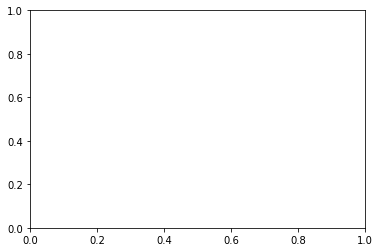

In [9]:
sns.distplot(data['diagnosis'],bins=10, kde=False, rug=True)

In [13]:
#from PIL import Image

In [15]:
#im = Image.open(data['path'][0])
#width, height = im.size
#print(width,height) 
#im.show()

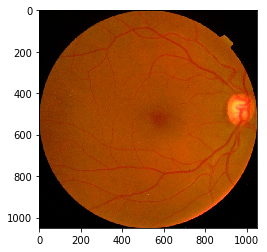

In [10]:
#plt.imshow(np.asarray(im))

In [8]:
nb_classes = 5
lbls = list(map(str, range(nb_classes)))
batch_size = 100
img_size = 64
nb_epochs = 5

In [9]:
lbls

['0', '1', '2', '3', '4']

In [10]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.25,
    horizontal_flip = True,    
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3
    )

In [11]:
train_generator=train_datagen.flow_from_dataframe(
    dataframe=data,
    directory="/Users/abhisheknajbile/Documents/TermProject_3253/input/train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    classes=lbls,
    target_size=(img_size,img_size),
subset='training')

valid_generator=train_datagen.flow_from_dataframe(
    dataframe=data,
    directory="/Users/abhisheknajbile/Documents/TermProject_3253/input/train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical", 
    classes=lbls,
    target_size=(img_size,img_size),
subset='validation')



Found 2747 images belonging to 5 classes.
Found 915 images belonging to 5 classes.


# Creating a Model

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D, Conv2D

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(img_size,img_size,3)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(5, activation="softmax"))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 576005    
Total params: 596,261
Trainable params: 596,261
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit_generator(generator=train_generator,                   
                                    steps_per_epoch=100,
                                    validation_data=valid_generator,                    
                                    validation_steps=30,
                                    epochs=nb_epochs,
                                    max_queue_size=16,
                                    workers=2,
                                    use_multiprocessing=True,
                                    verbose=1)

Epoch 1/5


W0814 18:02:10.047233 4736402880 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100/100 [==============================] - 670s 7s/step - loss: 1.0002 - accuracy: 0.6402 - val_loss: 0.8889 - val_accuracy: 0.6750
Epoch 2/5
100/100 [==============================] - 624s 6s/step - loss: 0.8549 - accuracy: 0.6974 - val_loss: 0.8566 - val_accuracy: 0.6871
Epoch 3/5
100/100 [==============================] - 593s 6s/step - loss: 0.8231 - accuracy: 0.7118 - val_loss: 0.8651 - val_accuracy: 0.6918
Epoch 4/5
100/100 [==============================] - 641s 6s/step - loss: 0.8301 - accuracy: 0.7114 - val_loss: 0.8907 - val_accuracy: 0.6838
Epoch 5/5
100/100 [==============================] - 593s 6s/step - loss: 0.8137 - accuracy: 0.7128 - val_loss: 0.8607 - val_accuracy: 0.6973


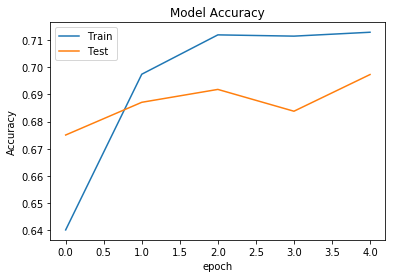

In [24]:
#Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


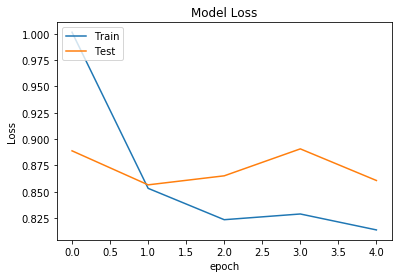

In [26]:
#Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()